<a href="https://colab.research.google.com/github/sudhir2016/Google-Colab-11/blob/master/Mask_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Python, TensorFlow and Keras libraries.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import cv2
import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model

In [ ]:
#!git clone https://github.com/prajnasb/observations

In [3]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 40.52 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


Create empty lists for with_mask/without_mask images (X) and labels(Y).

In [6]:
X=[]
Y=[]

In [ ]:
!unzip Test.zip

Load 690 with_mask images from dataset.

In [8]:
 image1= [cv2.imread(file) for file in glob.glob('/content/Test/*.*')]

In [9]:
len(image1)

123

Resize the images to 224*224 and append to list X. Declare a label of 0 (with_mask) for each of these images and append to label list Y.

In [10]:
for i in range (123):
  image2 = cv2.resize(image1[i], dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  X.append(image2)
  out=0
  Y.append(out)

Load 686 without_mask images from dataset.

In [11]:
image3 = [cv2.imread(file) for file in glob.glob('/content/PlantVillage-Dataset/raw/color/Tomato___healthy/*.*')]

In [12]:
len(image3)

1591

Resize the images to 224*224 and append to list X. Declare a label of 1 (without_mask) for each of these images and append to label list Y.

In [13]:
for i in range (123):
  image4 = cv2.resize(image3[i], dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
  X.append(image4)
  out=1
  Y.append(out)

Scale the pixel intensity in images in the range of 0-1 and convert X and Y lists to NumPy array.

In [14]:
X=np.array(X)/255.0

In [15]:
Y=np.array(Y)

Prepare training and test datasets

In [16]:
(trainX, testX, trainY, testY) = train_test_split(X, Y,
	test_size=0.20)

Build the model

In [17]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

58892288/58889256 [==============================] - 1s 0us/step


In [18]:
for layer in baseModel.layers:
	layer.trainable = False

In [19]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)

In [20]:
model = Model(inputs=baseModel.input, outputs=headModel)

Compile the model


In [21]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Train the model

In [22]:
model.fit(trainX,trainY,epochs=5,shuffle=True)

Epoch 1/5
7/7 [==============================] - 1s 94ms/step - loss: 0.7180 - accuracy: 0.5510
Epoch 2/5
7/7 [==============================] - 0s 59ms/step - loss: 0.4873 - accuracy: 0.7806
Epoch 3/5
7/7 [==============================] - 0s 60ms/step - loss: 0.3339 - accuracy: 0.9082
Epoch 4/5
7/7 [==============================] - 0s 59ms/step - loss: 0.2522 - accuracy: 0.9490
Epoch 5/5
7/7 [==============================] - 0s 59ms/step - loss: 0.1942 - accuracy: 0.9643


Evaluate the model

In [23]:
model.evaluate(testX,testY)

2/2 [==============================] - 1s 267ms/step - loss: 0.1884 - accuracy: 0.9600


[0.18835559487342834, 0.9599999785423279]

In [29]:
model.save('model_val.h5')

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Make predictions

In [24]:
p=model.predict(X)

Verify prediction

In [27]:
p[150]

array([0.91314375], dtype=float32)

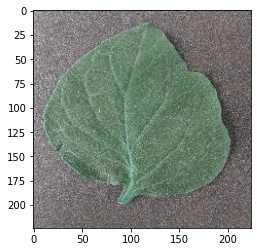

In [28]:
plt.imshow(X[150])